

---



# 서포트 벡터 머신

# 필기 숫자 이미지


*   MNIST 데이터 세트 : 28*28 픽셀 (784 픽셀), [0,255]값, 7만개 샘플

*   sklearn 데이터 세트 : 8*8 픽셀 (64 픽셀), [0,16]값, 1,797개 샘플

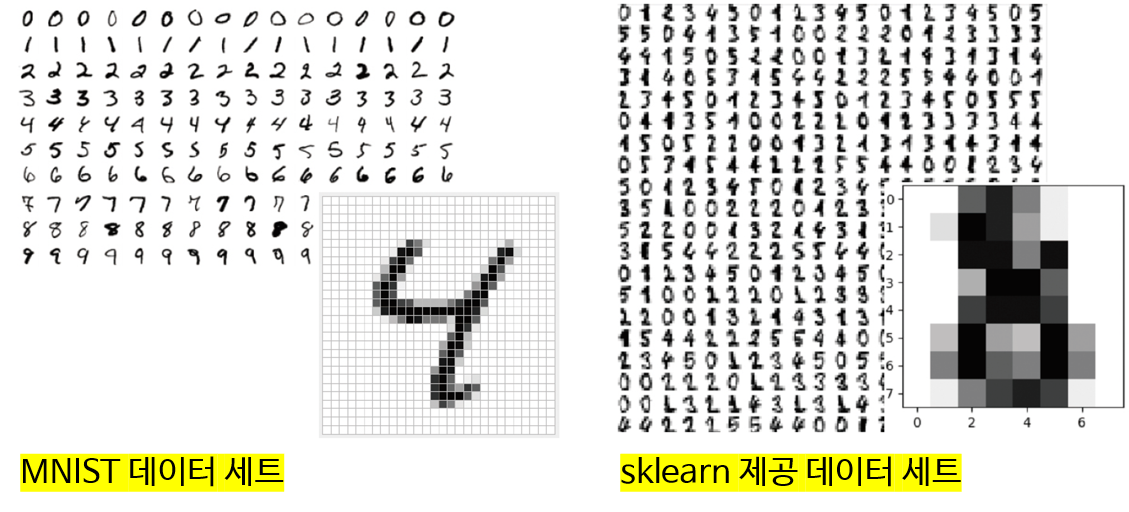

<이미지 출처: 파이썬으로 만드는 인공지능(오일석, 이진석, 한빛아카데미)>


# 1. 데이터 준비 


In [ ]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

digit=datasets.load_digits()

# 2. 모델 훈련

In [ ]:
train_input, test_input, train_target, test_target=train_test_split(digit.data, digit.target, random_state=42)
s=svm.SVC()
s.fit(train_input, train_target)

SVC()

# 3. 모델 평가
혼동 행렬 (confusion matrix)
*   부류 별로 옳은 분류와 틀린 분류의 개수를 기록한 행렬


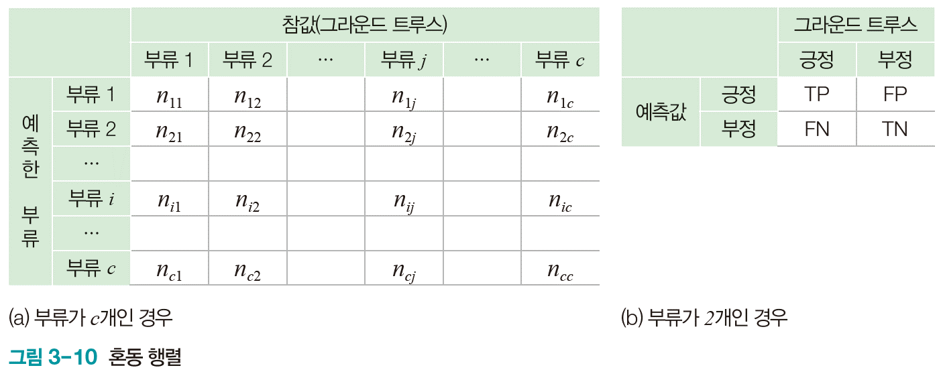

<이미지 출처: 파이썬으로 만드는 인공지능(오일석, 이진선, 한빛아카데미)>






---

## 혼동 행렬

In [ ]:
res=s.predict(test_input)

conf=np.zeros((10,10))
for i in range(len(res)):
  conf[res[i]][test_target[i]]+=1 #conf=conf+1, con+=1
print(conf)

[[43.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 37.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 38.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 45.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 55.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 58.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1. 45.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 40.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0. 37.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1. 46.]]


## 혼동 행렬 확인

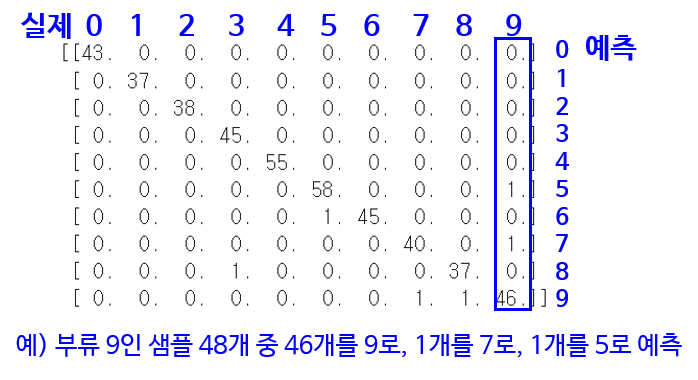

## 정확도 계산

In [ ]:
no_correct=0
for i in range(10):
  no_correct+=conf[i][i] #a+=1  a=a+1

accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확도는", round(accuracy*100,2), "%입니다.")

테스트 집합에 대한 정확도는 98.67 %입니다.


# 교차 검증



*   train/test 나누기의 한계 : 우연히 높은 정확도 또는 낮은 정확도 발생 가능성


*   k-겹 교차 검증 (k-fold cross validation)

>1.   데이터 세트를 k개의 부분집합으로 나눔
2.   k-1개의 부분집합으로 훈련
3. 나머지 1개의 데이터 세트로 성능 측정


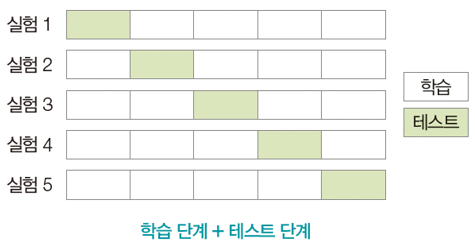

<이미지 출처 : 파이썬으로 만드는 인공지능(오일석, 이진선, 한빛아카데미)>



# 4. 교차 검증을 적용한 SVM 모델

In [ ]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np

digit=datasets.load_digits()

s=svm.SVC()
accuracies=cross_val_score(s, digit.data, digit.target, cv=5) 

print(accuracies.round(3))
print("평균 정확도:{0:.3f}, std:{1:.3f}".format(accuracies.mean()*100, accuracies.std()))

[0.961 0.944 0.983 0.989 0.939]
평균 정확도:96.328, std:0.020


설명 : 실행 결과 정확도에 편차가 있음

# 5. C를 변화시키며 모델 훈련

In [ ]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

digit=datasets.load_digits()

#train_test_split
print("<train/test split>")
train_input, test_input, train_target, test_target=train_test_split(digit.data, digit.target,random_state=42)
for c in [0.1,1.0,10.0]:
  s=svm.SVC(C=c)
  s.fit(train_input, train_target)
  print("C={0:} \t train acc={1:.3f} \t test acc={2:.3f}".format(c, s.score(train_input, train_target), s.score(test_input, test_target)))

# 5-fold cross validation
print("\n<5-fold cross validation>")
for c in [0.1,1.0,10.0]:
  s=svm.SVC(C=c)
  accuracies=cross_val_score(s, digit.data, digit.target, cv=5)
  print("C=",c, accuracies.round(3),"mean:{0:.3f}, std:{1:.3f}".format(accuracies.mean()*100, accuracies.std()))

#help(cross_val_score)

<train/test split>
C=0.1 	 train acc=0.961 	 test acc=0.958
C=1.0 	 train acc=0.996 	 test acc=0.987
C=10.0 	 train acc=1.000 	 test acc=0.989

<5-fold cross validation>
C= 0.1 [0.925 0.911 0.944 0.975 0.903] mean:93.157, std:0.026
C= 1.0 [0.961 0.944 0.983 0.989 0.939] mean:96.328, std:0.020
C= 10.0 [0.981 0.958 0.983 0.989 0.958] mean:97.385, std:0.013
